# Measure Worksheet

## 1. Setup
This section load python objects and variables please check the ```cam``` variable

### 1.1 Load python objects
Loads ```scope``` and ```lamp``` python objects for reading sekonic and communication with the lamp

In [1]:
cam = "http://192.168.2.224/video_feed"
sharedFolder = r"C:\Users\Virtual Production 2\Documents\ApolloLogs\\"

%run calibration_setup_v2.ipynb

pygame 2.1.2 (SDL 2.0.18, Python 3.10.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 1.2 Connect to lamp
Lamp needs to be closed before it can be opened again.
If you dont know the serial port where the lamp is connected use the Find COM port section
1st You need to setup sekonic and feedback camera (the areas where the data will be read, 1st -green value is set up so it would be possibel to get dUV - sign location), then close the lamp and start again with the scope objects

In [3]:
lamp1.close()

In [5]:
lamp1 = apollo_device(ComPort='COM11')
lamp1.getId()
lamp1.macId = lamp1.macId.replace(":","")
lamp1.macId

'C45BBE2D443C'

In [6]:
lamp1.color = [200,50,50,500,0]
lamp1.update()

#### [Optional] Find COM port

In [9]:
# Get COM port list
import serial.tools.list_ports

com_ports = list(serial.tools.list_ports.comports())

for port, desc, hwid in com_ports:
    print(str(port)+" "+str(desc))

COM5 USB Serial Port (COM5)
COM6 USB Serial Port (COM6)


### 1.3 Set Sekonic camera areas
Set the area where to "read" the Tcp, dUV and lux variables
Once the object is initalized tune the paramters and test by ```update()```
To save the paramteres use the Setup below to generate the ```saved_string``` and copy and paste it into funtion paramter and save the workbook

In [7]:
Brightness = scope(saved_string="self.slider_h.value = (232, 391)\nself.slider_v.value = (319, 377)\nself.minus_comp.value = False\nself.minus_brightness.value = '150'\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.rota.value = '90'\nself.flip.value = False\nself.flop.value = False\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [8]:
Brightness.update()

4140

In [10]:
dUV = scope(saved_string="self.slider_h.value = (258, 447)\nself.slider_v.value = (237, 295)\nself.minus_comp.value = True\nself.minus_brightness.value = '150'\nself.offset_x.value = -85\nself.offset_y.value = 3\nself.rota.value = '90'\nself.flip.value = False\nself.flop.value = False\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('20.0', '0,0'), ('0.6', '0.0'), ('0.8', '0.0')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [11]:
dUV.update()

-0.0317

In [12]:
Kelvin = scope(saved_string="self.slider_h.value = (259, 417)\nself.slider_v.value = (159, 217)\nself.minus_comp.value = False\nself.minus_brightness.value = '150'\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.rota.value = '90'\nself.flip.value = False\nself.flop.value = False\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('G', '6')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [31]:
Kelvin.update()

5597

#### Setup

In [26]:
Brightness.save_string()

"self.slider_h.value = (229, 388)\nself.slider_v.value = (390, 448)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.')]) \n"

In [19]:
dUV.save_string()

"self.slider_h.value = (250, 443)\nself.slider_v.value = (234, 298)\nself.minus_comp.value = True\nself.minus_brightness.value = 150\nself.offset_x.value = -80\nself.offset_y.value = 2\nself.rota.value = 90\nself.flip.value = False\nself.flop.value = False\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('20.0', '0,0'), ('0.6', '0.0'), ('0.8', '0.0')]) \n"

In [28]:
Kelvin.save_string()

"self.slider_h.value = (254, 412)\nself.slider_v.value = (228, 286)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('G', '6')]) \n"

# Measure

In [22]:
lamp1.close()

In [23]:
lamp1 = apollo_device(ComPort='COM11',SekBrightnes=Brightness, SekDuv=dUV, SekKelvin=Kelvin)
lamp1.getId()
lamp1.macId = lamp1.macId.replace(":","")
lamp1.macId

'C45BBE2D443C'

In [ ]:
%%time

import datetime
import pandas as pd

df = None

def measureKelvinRange(wbIndex = 0):
    global df
    
    wbRanges = [0,14,71,100,178,255]
    tempIndex = wbRanges[wbIndex]

    
    if df is None:
        data = {'sampleNr': [], 'Brightness': [], 'Kelvin': [], 'dUV': [], 'mixedR': [], 'mixedG': [], 'mixedB': [], 'mixedW': [], 'redActual': [], 'lampTemp': [], 'lampTempTarget': [], 'fanSpeed': []}
        df = pd.DataFrame(data)

    lamp1.color = [1,1,1,tempIndex,0]
    lamp1.update(rgbtMode=True)
    time.sleep(10)

    for i in reversed(range(1,255)):
        lamp1.color = [i,i,i,tempIndex,0]
        lamp1.update(rgbtMode=True)
        time.sleep(0.3)
        lamp1.read()

        timeout = 2
        if i<50:
            timeout = 7
        if i<100:
            timeout = 3

        time.sleep(timeout)
        readBrightness = Brightness.update()
        readKelvin = Kelvin.update()
        readDuv = dUV.update()

        jsonString = "{"+lamp1.lastValAsJsonString[1:-1]+"}"
        jsonObject = eval(jsonString)

        new_line = pd.DataFrame([{
            'sampleNr':i,
            'KelvinId':wbIndex,
            'Kelvin':readKelvin,
            'Brightness':readBrightness,
            'dUV':readDuv,
            'mixedR': jsonObject['mixed_red'],
            'mixedG': jsonObject['mixed_green'],
            'mixedB': jsonObject['mixed_blue'],
            'mixedW': jsonObject['mixed_white'],
            'redActual': jsonObject['red_actual'],
            'lampTemp': jsonObject['lamp_temp'],
            'lampTempTarget': jsonObject['lamp_target'],
            'fanSpeed': jsonObject['fan_speed']}])

        df = pd.concat([df, new_line],ignore_index=True)

        print('i:'+str(i)+", dUV:"+str(readDuv)+" Kelvin:"+str(readKelvin)+"K Brightness:"+str(readBrightness)+"lx")


for i in range(6):
    print(f"Measuring range {KelvinRangeIds[i]}\n")
    measureKelvinRange(i)
    
file_path = sharedFolder+"Apollo"+str(lamp1.macId)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".py"
df.to_csv(file_path, index=False)
print("Saved to: "+file_path)

Measuring range 2800

i:254, dUV:0.0002 Kelvin:2778K Brightness:9830lx
i:253, dUV:0.0003 Kelvin:2785K Brightness:9710lx
i:252, dUV:0.0003 Kelvin:2785K Brightness:9560lx
i:251, dUV:0.0003 Kelvin:2790K Brightness:9390lx
i:250, dUV:0.0003 Kelvin:2786K Brightness:9420lx
i:249, dUV:0.0004 Kelvin:2778K Brightness:9130lx
i:248, dUV:0.0003 Kelvin:2775K Brightness:9140lx
i:247, dUV:0.0005 Kelvin:2777K Brightness:9000lx
i:246, dUV:0.0005 Kelvin:2781K Brightness:8720lx
i:245, dUV:0.0006 Kelvin:2783K Brightness:8600lx
i:244, dUV:0.0003 Kelvin:2778K Brightness:8600lx
i:243, dUV:0.0004 Kelvin:2778K Brightness:8470lx
i:242, dUV:0.0002 Kelvin:2780K Brightness:8190lx
i:241, dUV:0.0002 Kelvin:2782K Brightness:8070lx
i:240, dUV:0.0006 Kelvin:2778K Brightness:7950lx
i:239, dUV:0.0007 Kelvin:2775K Brightness:7920lx
i:238, dUV:0.0005 Kelvin:2778K Brightness:7670lx
i:237, dUV:0.0006 Kelvin:2784K Brightness:7550lx
i:236, dUV:0.0005 Kelvin:2778K Brightness:7380lx
i:235, dUV:0.0005 Kelvin:2784K Brightness:7240l

In [17]:
sharedFolder = r"C:\Users\Virtual Production 2\Documents\ApolloLogs\\"
file_path = sharedFolder+"Apollo"+str(lamp1.macId)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".py"
df.to_csv(file_path, index=False)
print("Saved to: "+file_path)

Saved to: C:\Users\Virtual Production 2\Documents\ApolloLogs\\ApolloC45BBE2D443C_22112023_062526.py


In [11]:
df[['dUV']].describe()

,dUV
count,1524.000000
mean,0.000208
std,0.001285
min,-0.006800
25%,-0.000300
50%,0.000200
75%,0.000600
max,0.006100


In [57]:
df[(df['Kelvin'] > 3000) & (df['Kelvin'] < 3600)]

,sampleNr,Brightness,Kelvin,dUV,mixedR,mixedG,mixedB,mixedW,redActual,lampTemp,lampTempTarget,fanSpeed
254,254.0,9800.0,3192.0,0.0010,975.0,600.0,8.0,522.0,5.0,29.875,65.0,0.0
255,253.0,9650.0,3199.0,0.0011,962.0,592.0,8.0,515.0,636.0,29.875,65.0,0.0
256,252.0,9530.0,3189.0,0.0011,949.0,584.0,8.0,508.0,628.0,30.250,65.0,0.0
257,251.0,9410.0,3198.0,0.0011,936.0,576.0,8.0,501.0,620.0,30.375,65.0,0.0
258,250.0,9260.0,3194.0,0.0011,923.0,568.0,8.0,494.0,612.0,30.625,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
503,5.0,75.0,3479.0,0.0014,9.0,3.0,0.0,6.0,5.0,28.250,65.0,0.0
504,4.0,75.0,3478.0,0.0014,9.0,3.0,0.0,6.0,5.0,28.250,65.0,0.0
505,3.0,75.6,3473.0,0.0012,9.0,3.0,0.0,6.0,5.0,28.250,65.0,0.0
506,2.0,75.8,3480.0,0.0013,9.0,3.0,0.0,6.0,5.0,28.250,65.0,0.0


In [24]:
import datetime
file_path = "Apollo"+str(lamp1.macId)+"_"+str(wbIndex)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".py"
df.to_csv(file_path, index=False)
print("Saved to: "+file_path)

Saved to: Apollo782184456C74_1_15112023_121109.py


In [14]:
lamp1.close()

In [27]:
df

,sampleNr,Brightness,Kelvin,dUV,mixedR,mixedG,mixedB,mixedW,redActual,lampTemp,lampTempTarget,fanSpeed,KelvinId
0,254.0,9830.0,2778.0,0.0002,1167.0,627.0,8.0,370.0,5.0,29.125,65.0,0.0,0.0
1,253.0,9710.0,2785.0,0.0003,1151.0,619.0,8.0,365.0,759.0,29.375,65.0,0.0,0.0
2,252.0,9560.0,2785.0,0.0003,1135.0,610.0,8.0,360.0,749.0,29.500,65.0,0.0,0.0
3,251.0,9390.0,2790.0,0.0003,1119.0,602.0,8.0,355.0,739.0,29.500,65.0,0.0,0.0
4,250.0,9420.0,2786.0,0.0003,1103.0,593.0,8.0,350.0,729.0,29.875,65.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,5.0,149.0,9685.0,-0.0003,4.0,3.0,3.0,17.0,2.0,34.250,65.0,0.0,5.0
1520,4.0,148.0,9692.0,-0.0003,4.0,3.0,3.0,17.0,2.0,34.250,65.0,0.0,5.0
1521,3.0,145.0,9848.0,-0.0003,4.0,3.0,3.0,16.0,2.0,34.250,65.0,0.0,5.0
1522,2.0,145.0,9830.0,-0.0003,4.0,3.0,3.0,16.0,2.0,34.250,65.0,0.0,5.0


Draw a graph

C:\Users\Virtual Production 2\AppData\Local\Temp\ipykernel_95288\3434757345.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KelvinDifference'] = 3200 - data['Kelvin']


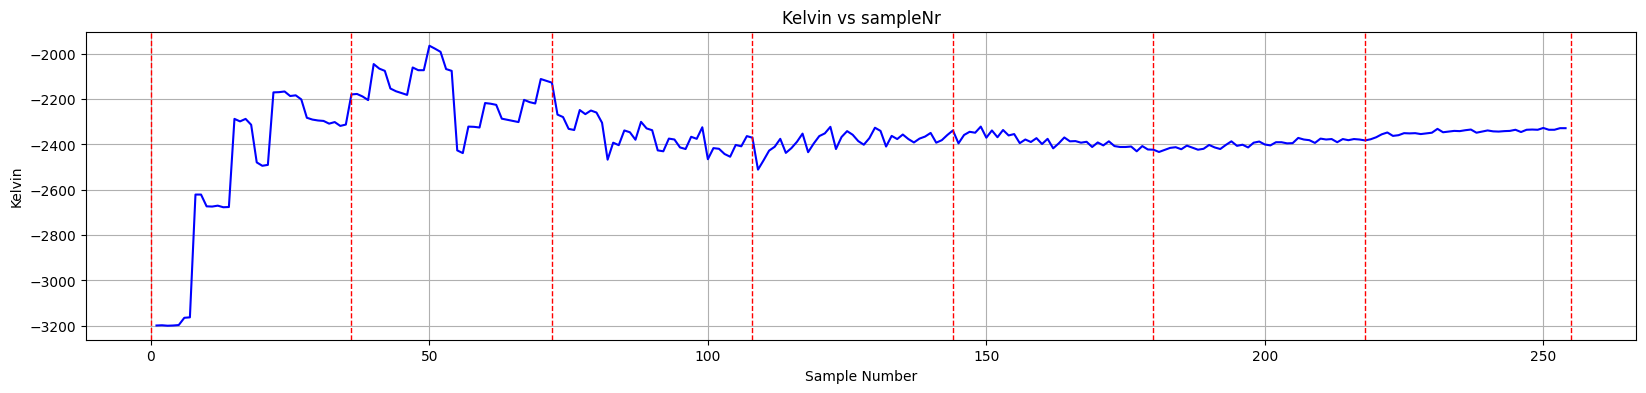

In [32]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = df[(df['KelvinId'] == 3)]

# Calibration positions (0 to 255) mapped to their respective sample numbers
calibration_positions = [0, 36, 72, 108, 144, 180, 218, 255]  # Adjusted for 9 points

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))

data['KelvinDifference'] = 3200 - data['Kelvin']

plt.plot(data['sampleNr'], data['KelvinDifference'], color='b')
plt.title('Kelvin vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('Kelvin')
plt.grid(True)

# Add vertical lines for calibration positions
for position in calibration_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1, label=f'Calibration Position {position}')

# Show the graph
#plt.legend()
kelvinplt = plt



In [25]:
def kelvin_to_color(kelvin):
    # Map the Kelvin value to the range [0, 1]
    normalized_kelvin = (kelvin - 1500) / (15000 - 1500)
    
    # Linear interpolation between 0 and 255 for red and green channels
    red_value = 1 - normalized_kelvin
    
    # Invert the value for blue channel
    blue_value = normalized_kelvin
    
    # Return the RGB color tuple
    return (red_value, max(red_value, blue_value)*.5 ,blue_value)

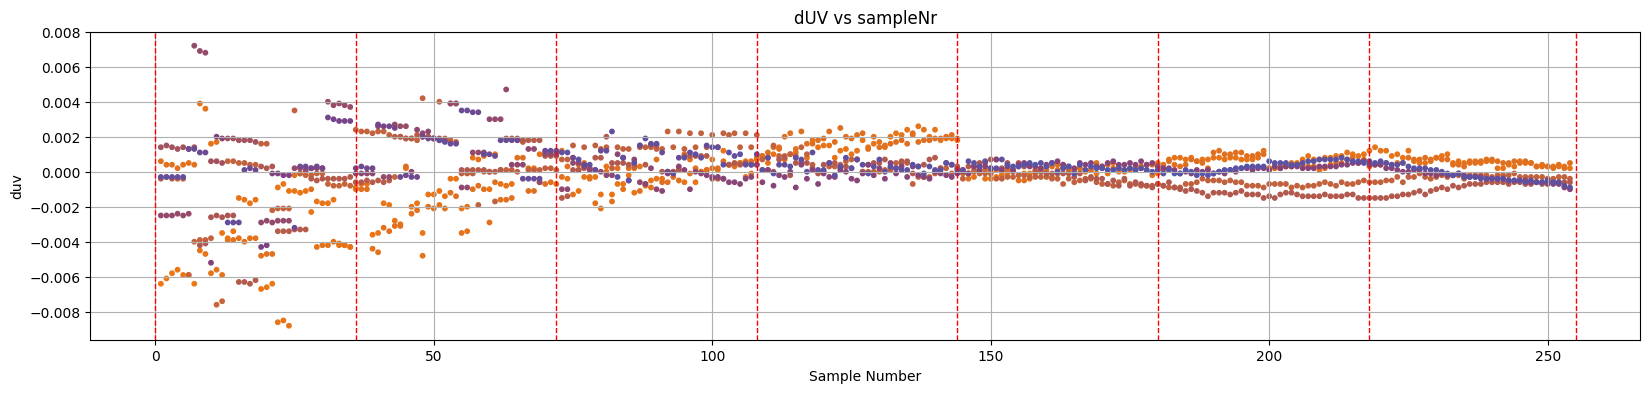

In [26]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = df

# Calibration positions (0 to 255) mapped to their respective sample numbers
calibration_positions = [0, 36, 72, 108, 144, 180, 218, 255]  # Adjusted for 9 points

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))
# Create an array of colors based on Kelvin values
point_colors = data['Kelvin'].apply(lambda x: kelvin_to_color(x))

# Plot points with colors based on the Kelvin values
plt.scatter(data['sampleNr'], data['dUV'], c=point_colors, s=10)

plt.title('dUV vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('duv')
plt.grid(True)

# Add vertical lines for calibration positions
for position in calibration_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1, label=f'Calibration Position {position}')

# Show the graph
#plt.legend()
duvplot = plt



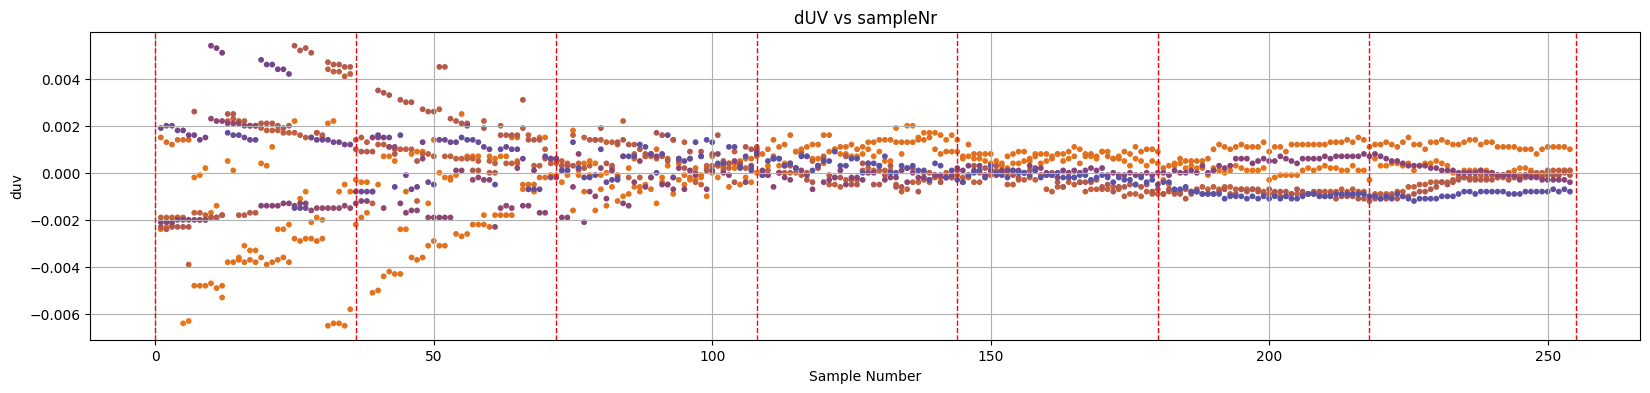

In [93]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = df

# Calibration positions (0 to 255) mapped to their respective sample numbers
calibration_positions = [0, 36, 72, 108, 144, 180, 218, 255]  # Adjusted for 9 points

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))
# Create an array of colors based on Kelvin values
point_colors = data['Kelvin'].apply(lambda x: kelvin_to_color(x))

# Plot points with colors based on the Kelvin values
plt.scatter(data['sampleNr'], data['dUV'], c=point_colors, s=10)

plt.title('dUV vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('duv')
plt.grid(True)

# Add vertical lines for calibration positions
for position in calibration_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1, label=f'Calibration Position {position}')

# Show the graph
#plt.legend()
duvplot = plt



In [95]:
data[['dUV']].describe()

,dUV
count,1524.000000
mean,0.000041
std,0.001382
min,-0.006500
25%,-0.000625
50%,0.000100
75%,0.000700
max,0.005400


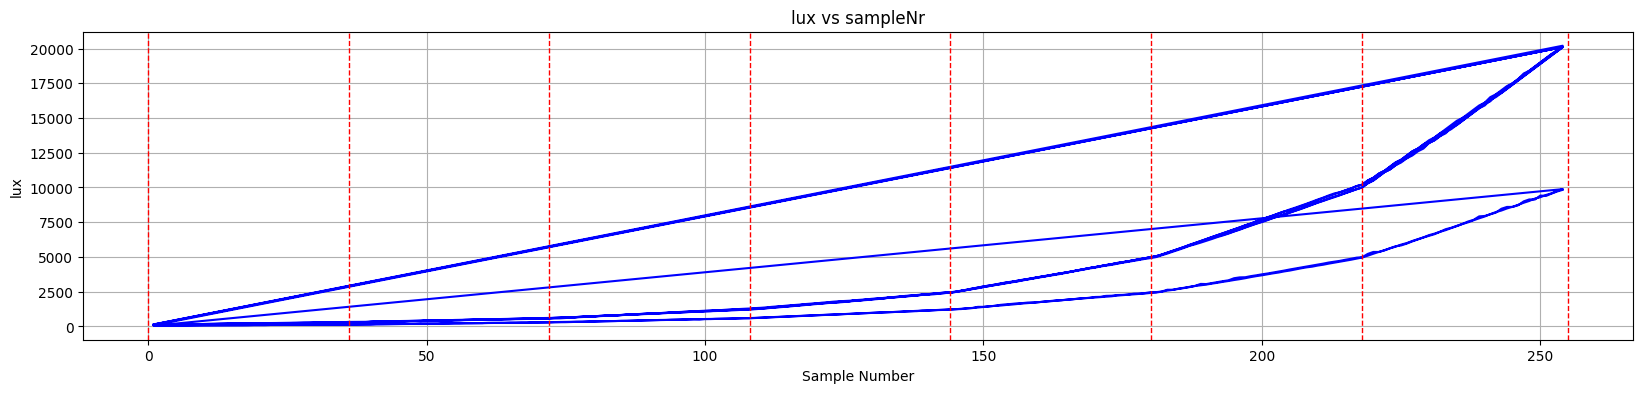

In [33]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = df

# Calibration positions (0 to 255) mapped to their respective sample numbers
calibration_positions = [0, 36, 72, 108, 144, 180, 218, 255]  # Adjusted for 9 points

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))
plt.plot(data['sampleNr'], data['Brightness'], color='b')
plt.title('lux vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('lux')
plt.grid(True)

# Add vertical lines for calibration positions
for position in calibration_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1, label=f'Calibration Position {position}')

# Show the graph
#plt.legend()
luxplot = plt



In [13]:
df.describe()

,sampleNr,Brightness,Kelvin,dUV,mixedR,mixedG,mixedB,mixedW,redActual,lampTemp,lampTempTarget,fanSpeed
count,254.00000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.00000,254.000000,254.0,254.0
mean,127.50000,2103.128740,2807.188976,0.000506,252.055118,140.527559,1.370079,84.106299,168.15748,32.772638,65.0,0.0
std,73.46768,2551.075514,77.598718,0.001270,305.906269,174.602986,2.158916,100.429239,204.44586,2.741246,0.0,0.0
min,1.00000,65.000000,2416.000000,-0.006600,10.000000,3.000000,0.000000,4.000000,6.00000,28.125000,65.0,0.0
25%,64.25000,258.000000,2787.000000,0.000300,30.000000,15.000000,0.000000,12.000000,19.00000,30.375000,65.0,0.0
50%,127.50000,928.500000,2805.500000,0.000800,108.000000,57.500000,0.000000,37.000000,71.50000,32.750000,65.0,0.0
75%,190.75000,3102.500000,2836.000000,0.001000,375.750000,210.000000,2.000000,123.250000,253.25000,35.343750,65.0,0.0
max,254.00000,9800.000000,3015.000000,0.003000,1171.000000,665.000000,8.000000,382.000000,770.00000,36.625000,65.0,0.0
